#Линейная регрессия

##Linear Regression Model

##GLM

##Distributions

##Maximum Likelihood

#Классификация

##Logistic Regression

Логистическая регрессия - линейный классификатор. Признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 

Функция: $$y = sign(w^Tx + b)$$

Но это ещё не всё - логистическая регрессия прогнозирует вероятность отнесения к классу: $$\sigma(z) = \frac{1}{1 + exp^{-z}}$$

Как найти w и b? Лосс: $$\sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i)) = -\sum_{i=1}^{\ell} \log\frac{1}{(1 + \exp(-y_iW^Tx_i))}$$

##SVM

##Decision Trees

##K-NN

##XOR-problem

#Этапы создания модели

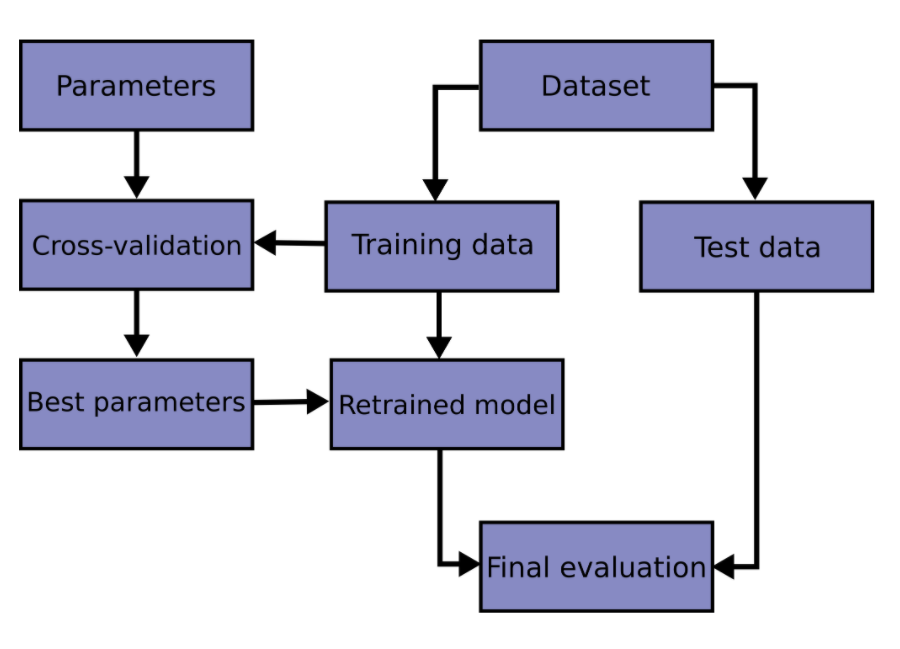

#Термины и методы

## Гиперпараметры и параметры

*Гиперпараметры модели* - параметры "снаружи" 
модели, которые используются для управления процессом обучения (для регулирования сложности модели). Помогают оценить параметры модели, часто подбираются эмпирическим путём. 

*Параметры модели* - параметры "изнутри" модели, которые модель использует для предсказания (они оцениваются данными/происходят из данных в процессе обучения).

Как отличить параметр от гиперпараметра: если ты что-то задаёшь вручную, то это гиперпараметр.

##Переобучение и недообучение

При обучении на тренинг сете важно помнить, чего нужно добиться - модель должна хороша обобщаться на новые данные. Это индуктивное обучение (паттерн на основе примеров). А генерализация - это наоборот, как хорошо паттерн, выученный моделью в процессе обучения, объясняет новые данные (поэтому важно, чтобы в модель не попадали тестовые данные). Термины для описания того, как хорошо модель обобщается на новые данные - overfitting и underfitting. 

*Переобучение* - модель предсказывает трейнинг сет. Модель выучила мельчайшие детали и теперь считает их частью паттерна, а не шумами и случайными штуками.  Наиболее часто происходит с непараметрическими и нелинейными моделями, где возможна большая гибкость в построении. Например, деревья решений - можно обрезать часть дерева после обучения. 

*Недообучение* - модель ничего не выучила и не может подстроиться к новым данным. 

Пример: в K-NN гиперпараметр "ближайшие соседи" может быть выставлен на 1 - большая сложность модели, модель практически запоминает структуру исходных данных. На трейнинг сете скор возрастает, но на тест сете высокая сложность ведёт к снижению точности и переобучению.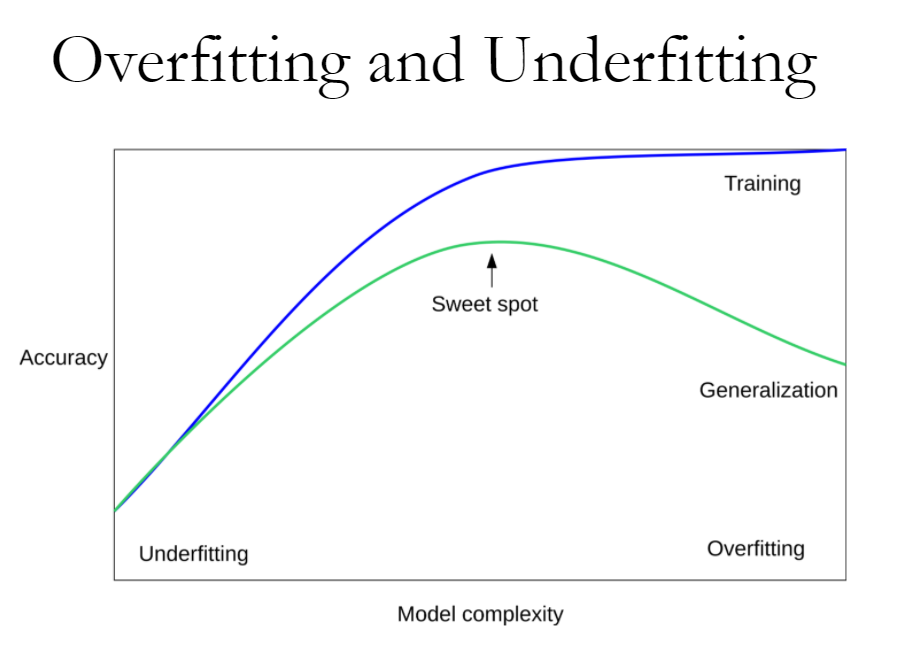 

###Validation & Learning curves

Понять, как проходит процесс обучения, обучилась модель или недообучилась, можно понять с помощью *валидационных кривых* - графиков, показывающих результат на тренировочной и валидационной выборке в зависимости от сложности модели.
* если две кривые распологаются близко, и обе ошибки велики, - это признак недообучения
* если две кривые далеко друг от друга, - это показатель переобучения

Также нужно знать, достаточно ли у нас данных для той или иной задачи: *кривые обучения* - графики, показывающие результаты на валидации и тренировочной подвыборке в зависимости от количества наблюдений.
* если кривые сошлись друг к другу, добавление новых данных не поможет – надо менять сложность модели
* если кривые еще не сошлись, добавление новых данных может улучшить результат.

##Train-'Validation'-Test

*Train-test split* - процедура для оценки точности модели, разбиение на данные для тренировки и данные для оценки. Не подходит для маленького датасета - тогда лучше использовать k-fold CV.
Train дает смещённый (biased) скор, если на нём оценивать качество модели. Поэтому для этих целей выявляется test сет.  



```
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
```



Сейчас еще часто делают отдельный валидационный сет - для выбора гиперпараметров модели и соответственно оценки модели.

*Training сет*: помещаем его в фит и тренируем.

*Validation сет*: тюнинг гиперпараметров. Смещение увеличится, т.к. научившись ещё и на валидационном сете, встраивает полученное знание в конфигурацию модели. Но чаще всего лучше пользоваться кросс-валидацией.

*Test сет*: используем для предсказания.

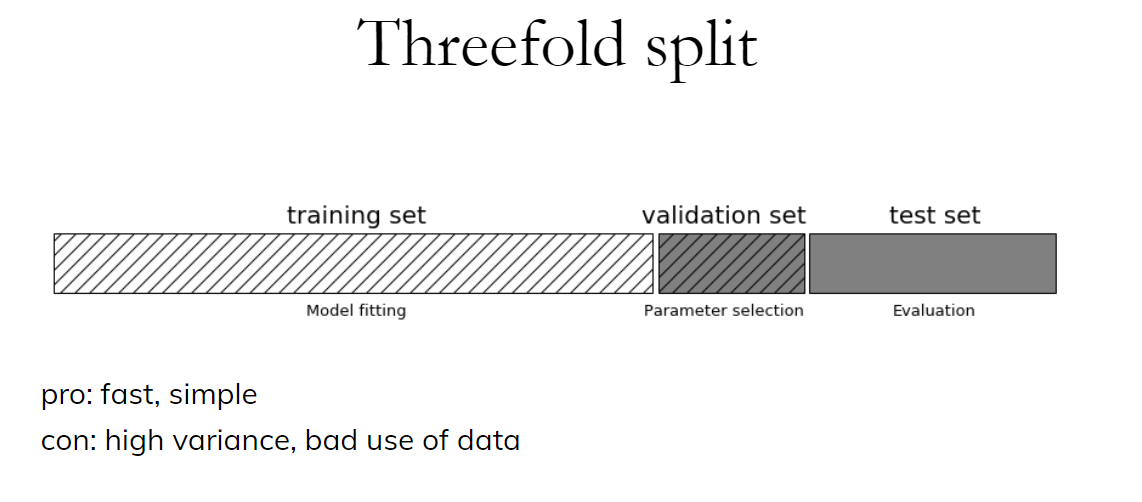

```
#трейн вперемешку с вал и тест
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
#отделяем трейн от вала
X_train, X_val, y_trai, y_val = train_test_split(X_trainval, y_trainval)

val_scores = []
neighbors = np.arange(1, 15, 2)
#тренируем на трейне, подбираем гиперпараметры на вале
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val)
#печатаем максимальное значение скора из массива
print("best validation score: {:.3f}".format(np.max(val_scores)))
#при каком значении мы получаем максимальный скор
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)

#используя полученные гиперпараметры, обучаем модель
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
#используем трейн вперемешку с вал
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))
```



>In general, for train-test data approach, the process is to split a given data set into 70% train data set and 30% test data set (ideally). In the training phase, we fit the model on the training data. And now to evaluate the model (i.e., to check how well the model is able to predict on unseen data), we run the model against the test data and get the predicted results. Since we already know what the expected results are, we compare/evaluate predicted and expected results to get the accuracy of the model.
If the accuracy is not up to the desired level, we repeat the above process (i.e., train the model, test, compare, train the mode, test, compare, …) until the desired accuracy is achieved. But in this approach, we are indirectly using the test data to improve our model. So the idea of evaluating the model on unseen data is not achieved in the first place. Therefore ‘validation data set’ comes into picture and we follow the below approach. Train the model, run the model against validation data set, compare/evaluate the output results. Repeat until a desired accuracy is achieved.
Once the desired accuracy is achieved, take the model and run it against the test data set and compare/evaluate the output results to get the accuracy.
If this accuracy meets the desired level, the model is used for production. If not, we repeat the training process but this time we obtain a new test data instead.



## Cross-validation

Либо test-'validaton'-train, либо train-'test' + CV. Метод с отдельным сетом вал очень быстрый, но когда мало данных лучше использовать к-фолдовый CV.

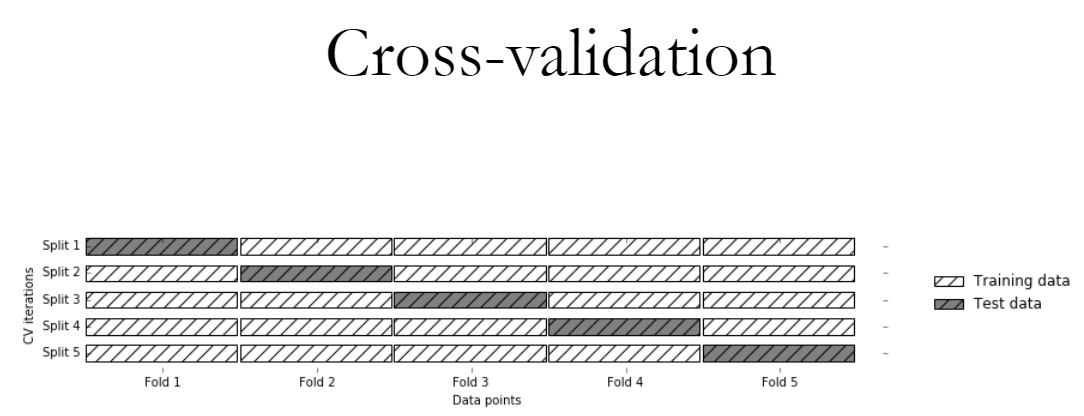

Для каждого сплита мы считаем скор. В конце считаем медианное значение скоров для пяти сплитов.
Это более надёжный и трудоёмкий метод - стабильнее (каждая дейта поинт присутствует только раз), но медленнее, чем test+val.

СV + test is a real thing:

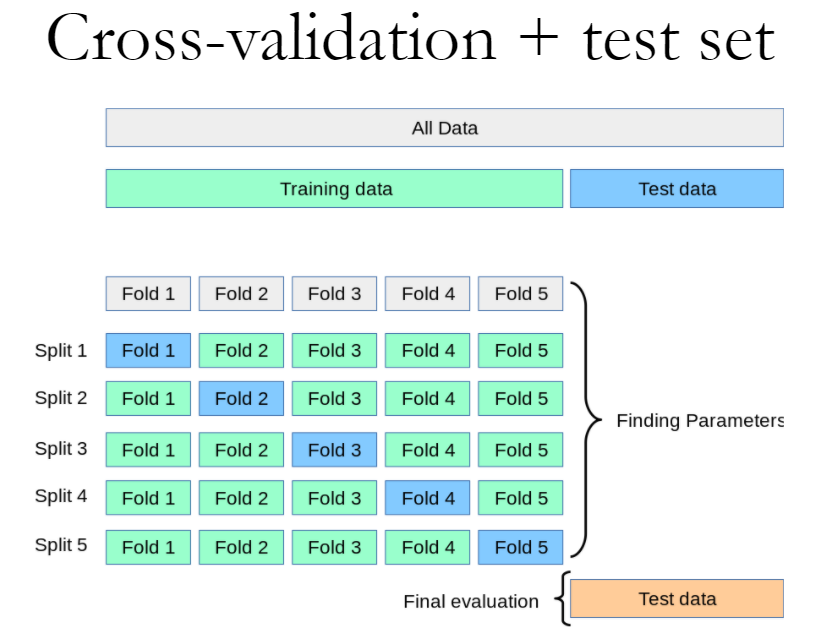

###(*) Grid Search & Random Search

## Scaling

Стандартизация важна, потому что многие алгоритмы ведут себя плохо, если их признаки не распределены более-менее нормально (то есть их величины (magnitude) слишком разные - а единицы измерения не должны влиять на результат работы нашего алгоритма!).

К скейлингу очень чувствительны K-NN и SVM (вообще любые ядерные методы в принципе).

*StandartScaler* - не смотрим на форму распределения и центрируем данные - удалить среднее значение каждого признака, разделить на среднее отклонение. 

*MinMaxScaler* - берется минимальное и максимальное значение, между ними помещается значение признака (на рисунке между 0 и 1). Данные с ярко выраженными границами

*RobustScaler* - хз что это, почти как стэндарт скейлер.

*Normalizer* - каждый ряд датасета делится на длину его вектора/сумму его абсолютных значений.

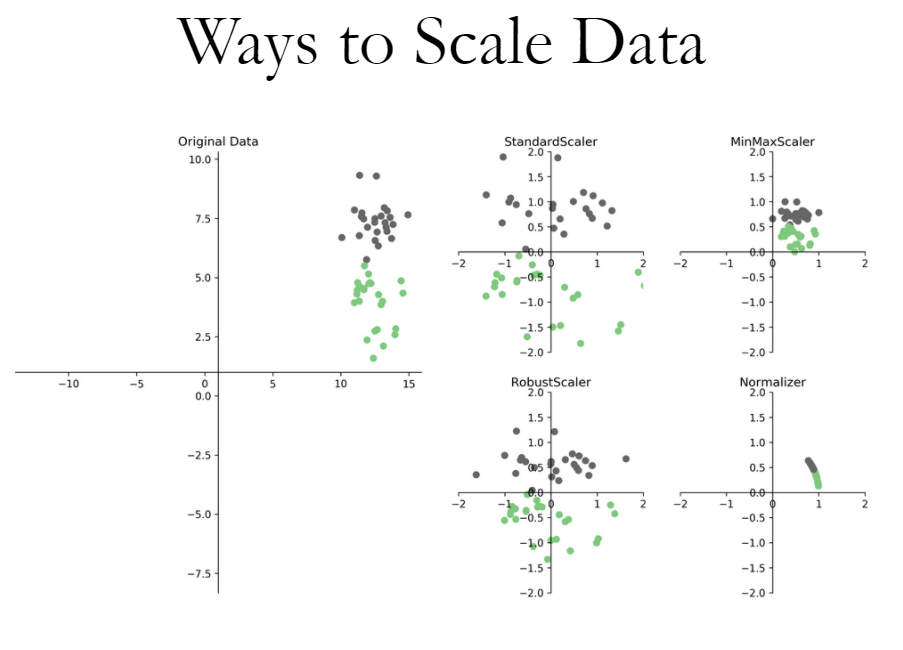


Пример использования StandardScaler:
```
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)
```



## Pipelines



```
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
>>> pipe = Pipeline(estimators)
>>> pipe
Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])
```



#Обучение без учителя

Проблема обучения без учителя: трудно оценить качество работы алгоритма, у нас нет этих самых оценок качества из алгоритмов обучения с учителем. Одна из самых частых задач в обучении без учителя - сокращение размерностей (dimensionality reduction). С одной стороны, DR может помочь с визулизацией данных (e.g. t-SNA method); с другой - подготовить данные к работе с алгоритмом обучения с учителем (e.g. decision trees), избавив от мультиколлинеарности.

##PCA

Проецирование данных на ортогональное им подпространство признаков.

### Математика

### Практика

##SVD

### Математика

### Практика